In [144]:
! cat ../results_full_data-fi/_Scores_header.csv ../results_130_data-fi/_Scores-*.csv > ./Scores_combined_sampled_130_with_RF_and_GBM_equal_count_num_splits.csv

In [145]:
# plotting scores
import pandas as pd
df = pd.read_csv("Scores_combined_sampled_130_with_RF_and_GBM_equal_count_num_splits.csv")
print (set(df.city.tolist()))
df.head()

{'Bogota', 'London', 'NewYorkCity', 'Zurich', 'Istanbul', 'Auckland', 'Singapore', 'MexicoCity', 'Mumbai', 'Capetown'}


,model,city,seed,depth,tod,#datapoints,#datapoints-train-sample-mean,#datapoints-test-sample-mean,np.mean(lr_object.scores_MSE),np.std(lr_object.scores_MSE),np.mean(lr_object.scores_QWK),np.std(lr_object.scores_QWK),num_splits
0,linearregression,London,90,1,6,"(4027, 16)",114.300000,57.166667,16.296872,26.549339,0.116996,0.143163,60
1,gradientboostingregressor,Zurich,85,1,6,"(330, 16)",115.700000,57.833333,10.200153,2.148785,0.246234,0.111894,60
2,gradientboostingregressor,MexicoCity,70,1,6,"(861, 16)",115.416667,57.683333,7.451762,1.390674,0.348485,0.117601,60
3,gradientboostingregressor,Auckland,30,1,6,"(297, 16)",115.900000,58.000000,3.121901,0.854492,0.646359,0.102133,60
4,gradientboostingregressor,Capetown,50,1,6,"(690, 16)",114.766667,57.383333,4.091058,0.828121,0.478665,0.091463,60


In [147]:
df_filt = df[ (df.city == "Singapore") & (df.model == "randomforestregressor")]
df_filt.head(20)
sorted_df = df_filt.sort_values('seed')
print (sorted_df.head(20))

                     model       city  seed  depth  tod #datapoints  \
51   randomforestregressor  Singapore    10      1    6    (30, 16)   
90   randomforestregressor  Singapore    25      1    6   (132, 16)   
133  randomforestregressor  Singapore    30      1    6   (173, 16)   
7    randomforestregressor  Singapore    45      1    6   (336, 16)   
146  randomforestregressor  Singapore    50      1    6   (408, 16)   
49   randomforestregressor  Singapore    65      1    6   (623, 16)   
87   randomforestregressor  Singapore    70      1    6   (714, 16)   
20   randomforestregressor  Singapore    85      1    6   (984, 16)   
137  randomforestregressor  Singapore    90      1    6  (1082, 16)   
52   randomforestregressor  Singapore   105      1    6  (1397, 16)   

     #datapoints-train-sample-mean  #datapoints-test-sample-mean  \
51                       20.000000                     10.000000   
90                       88.000000                     44.000000   
133           

In [148]:
df_filt = df[ (df.city == "Singapore") & (df.model == "randomforestregressor")]
df_filt.head(20)
sorted_df = df_filt.sort_values('num_splits')
print (sorted_df.head(20))

                     model       city  seed  depth  tod #datapoints  \
7    randomforestregressor  Singapore    45      1    6   (336, 16)   
20   randomforestregressor  Singapore    85      1    6   (984, 16)   
49   randomforestregressor  Singapore    65      1    6   (623, 16)   
51   randomforestregressor  Singapore    10      1    6    (30, 16)   
52   randomforestregressor  Singapore   105      1    6  (1397, 16)   
87   randomforestregressor  Singapore    70      1    6   (714, 16)   
90   randomforestregressor  Singapore    25      1    6   (132, 16)   
133  randomforestregressor  Singapore    30      1    6   (173, 16)   
137  randomforestregressor  Singapore    90      1    6  (1082, 16)   
146  randomforestregressor  Singapore    50      1    6   (408, 16)   

     #datapoints-train-sample-mean  #datapoints-test-sample-mean  \
7                       114.183333                     57.033333   
20                      114.000000                     57.016667   
49            

In [126]:
a = df.num_splits.tolist()
list.sort(a)

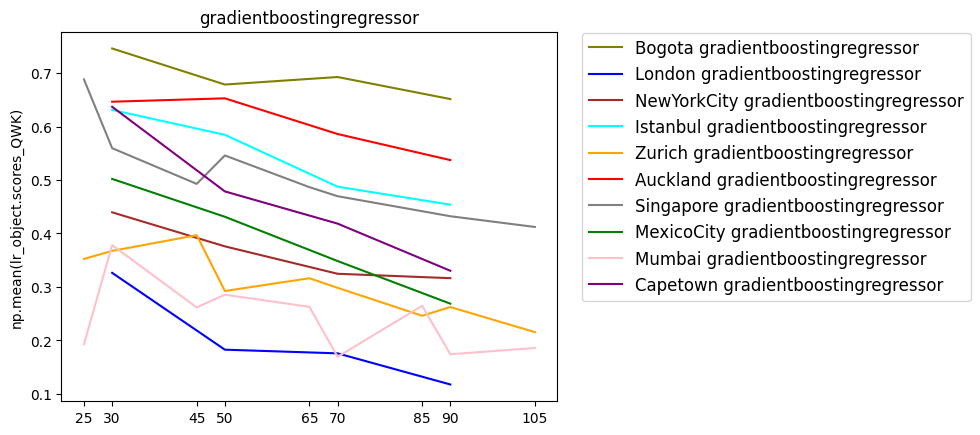

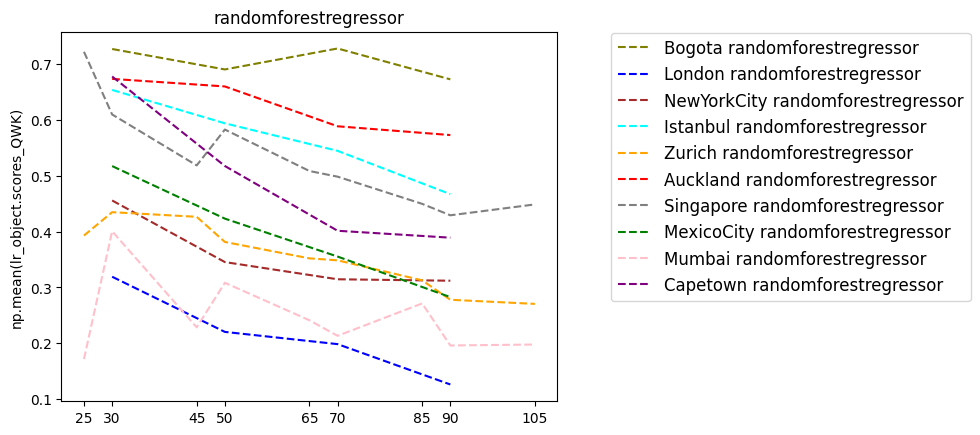

In [151]:
import matplotlib.pyplot as plt
import numpy as np

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
city_color = dict(zip(df.city.unique().tolist(), colors[:len(df.city.unique().tolist())]))
model_linestyle = {"linearregression":'-',
                  "randomforestregressor":"--",
                  "lasso":":",
                  "ridge":"-.",
                  "gradientboostingregressor":"-"}
# Create a list to store legend labels
legend_labels = []

# Iterate over each model
# models = list(set(df.model.tolist()))

for models in [
                # ["linearregression"],
                  # ["ridge"],
                #   ["lasso"],
                ["gradientboostingregressor"],
                  ["randomforestregressor"],
    
                    
              ]:

    for metric in [
        "np.mean(lr_object.scores_QWK)", 
        # "np.std(lr_object.scores_QWK)", 
        # "np.mean(lr_object.scores_MSE)", 
        # "np.std(lr_object.scores_MSE)"
    ]:

        filtered_rows_2 = df[["model", "city", "seed", "tod", "#datapoints", "#datapoints-train-sample-mean", metric]]

        for m, model in enumerate(models):
            filtered_rows_3 = filtered_rows_2[filtered_rows_2["model"] == model]                  

            
            
            # Get the unique cities for the current model
            cities = list(set(filtered_rows.city.tolist()))  # Limit to 7 cities
            
            # Iterate over each city
            for i, city in enumerate(cities):
                filtered_rows_4 = filtered_rows_3[filtered_rows_3["city"] == city]
                mean_mse = []
                scales = []
                
                # Iterate over each seed
                for seed in [25, 30, 45, 50, 65, 70, 85, 90, 105]:
                    filtered_rows_5 = filtered_rows_4[filtered_rows_4["seed"] == seed]
        
                    if len(filtered_rows_5[metric].tolist()) != 1:
                        continue
        
                    # print(model, city, seed, filtered_rows_3["np.mean(lr_object.scores_MSE)"].tolist()[0])
                    mean_mse.append(filtered_rows_5[metric].tolist()[0])
                    scales.append(seed)

                if len(scales) == 0:
                    continue
                
                sorted_data = sorted(zip(scales, mean_mse))
                sorted_scales, sorted_mean_mse = zip(*sorted_data)
                
                
        
                max_ = 1 # np.max(sorted_mean_mse)
                sorted_mean_mse = np.array(sorted_mean_mse)
                sorted_mean_mse = sorted_mean_mse/max_
                
                # Plot the data with the assigned color and line style
                if m==0 or i==0:
                    plt.plot(sorted_scales, sorted_mean_mse, label=city + " " + model, color=city_color[city], linestyle=model_linestyle[model])
                    legend_labels.append(city)
                    legend_labels.append(model)
                else:
                    plt.plot(sorted_scales, sorted_mean_mse, color=color, linestyle=linestyle)
                
        # plt.yscale("log")
        plt.ylabel(metric)
        plt.title(model)
        plt.xticks([25, 30, 45, 50, 65, 70, 85, 90, 105])
        # Sort the legend labels in alphabetical order
        sorted_labels = sorted(set(legend_labels))
        
        # Create the legend with 2 columns, one for cities and one for model types
        plt.legend(ncol=1, loc="upper right", fontsize=12, bbox_to_anchor=(1.85, 1.02))
        
        plt.show()


In [83]:
sorted_data

[]

In [135]:
filtered_rows_3

,model,city,seed,tod,#datapoints,#datapoints-train-sample-mean,np.mean(lr_object.scores_QWK)
1,linearregression,Singapore,65,6,"(623, 16)",114.533333,0.436511
4,linearregression,NewYorkCity,50,6,"(946, 16)",115.416667,0.162971
8,linearregression,MexicoCity,90,6,"(1251, 16)",116.450000,0.088552
9,linearregression,London,70,6,"(2783, 16)",116.650000,0.108076
10,linearregression,Mumbai,85,6,"(355, 16)",116.233333,0.114785
...,...,...,...,...,...,...,...
119,linearregression,Bogota,50,6,"(265, 16)",115.716667,0.402308
120,linearregression,Mumbai,45,6,"(131, 16)",87.000000,0.059322
121,linearregression,Capetown,30,6,"(314, 16)",115.016667,0.272583
122,linearregression,Zurich,50,6,"(143, 16)",95.000000,0.336333


,model,city,seed,tod,#datapoints,#datapoints-train-sample-mean,np.std(lr_object.scores_MSE)
4,randomforestregressor,Istanbul,30,6,"(740, 16)",114.500000,1.653442
5,randomforestregressor,Zurich,65,6,"(219, 16)",117.000000,0.116051
10,randomforestregressor,London,90,6,"(4027, 16)",116.283333,1.515196
13,randomforestregressor,Singapore,85,6,"(984, 16)",117.214286,0.815767
15,randomforestregressor,Zurich,30,6,"(62, 16)",41.000000,3.280086
...,...,...,...,...,...,...,...
237,randomforestregressor,Bogota,30,6,"(129, 16)",86.000000,1.402433
238,randomforestregressor,NewYorkCity,10,6,"(56, 16)",37.000000,1.850252
240,randomforestregressor,Zurich,70,6,"(247, 16)",112.500000,0.775491
243,randomforestregressor,London,30,6,"(723, 16)",113.300000,1.592060


In [55]:
df.city.unique().tolist()

['NewYorkCity',
 'Mumbai',
 'Capetown',
 'MexicoCity',
 'Singapore',
 'London',
 'Zurich',
 'Auckland',
 'Bogota',
 'Istanbul']